## CSV Results Processor

Graph results of climate prediction data captured via CSV data.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
debug = False

DRIVE_PATH = "/content/drive/MyDrive/data606"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "/src/"

# Root Path of the data on the cloud drive
DATA_ROOT = DRIVE_PATH + "/data/"

# Journal file
JOURNAL_LOG = SCRIPT_PATH + "cv-results.csv"

# Colors for rendering
colors = 'rbygm'

In [ ]:
GROUP_COLS = ['TargetLabel','WindowSize','TestPct','Columns']
TGT_LABEL = 0
WIND_SIZE = 1
TEST_PCT = 2
COLS = 3

In [ ]:
import glob
import os
import pandas as pd
from pathlib import Path
import numpy as np

df = pd.read_csv(JOURNAL_LOG)


In [ ]:
df

,DateTime,Model,TargetLabel,NumFeatures,WindowSize,TestPct,NumEpochs,MSE,MAE,MAPE,SKMAPE,Columns
0,20231002-1141,LSTMv2,LandAndOceanAverageTemperature,3,60,0.3,300,0.063580,0.214751,1.357980,1.357980,"['LandAverageTemperature', 'LandMaxTemperature..."
1,20231002-1150,LSTMv2,LandAndOceanAverageTemperature,3,100,0.3,300,0.020820,0.114104,0.732917,0.732917,"['LandAverageTemperature', 'LandMaxTemperature..."
2,20231002-1158,LSTMv2,LandAndOceanAverageTemperature,3,120,0.3,300,0.024091,0.120354,0.767855,0.767855,"['LandAverageTemperature', 'LandMaxTemperature..."
3,20231002-1207,LSTMv2,LandAndOceanAverageTemperature,3,80,0.3,300,0.036770,0.156892,0.994934,0.994934,"['LandAverageTemperature', 'LandMaxTemperature..."
4,20231002-1220,LSTMv2,LandAndOceanAverageTemperature,3,110,0.3,300,0.022116,0.110428,0.715988,0.715988,"['LandAverageTemperature', 'LandMaxTemperature..."
5,20231002-1230,LSTMv2,LandAndOceanAverageTemperature,3,110,0.3,300,0.019771,0.111629,0.720507,0.720507,"['LandAverageTemperature', 'LandMaxTemperature..."
6,20231002-1245,LSTMv2,LandAndOceanAverageTemperature,3,110,0.2,300,0.031143,0.142615,0.911515,0.911515,"['LandAverageTemperature', 'LandMaxTemperature..."
7,20231002-1307,LSTMv2,LandAndOceanAverageTemperature,3,110,0.3,300,0.021599,0.113942,0.729142,0.729142,"['LandAverageTemperature', 'LandMaxTemperature..."
8,20231108-1949,LSTMv2,landSeaAvgTemp,14,60,0.2,189,0.086620,0.278919,0.017570,0.017570,"['landAvgTemp', 'landMaxTemp', 'landMinTemp', ..."


In [ ]:
df_net = df.groupby(GROUP_COLS)['MAE'].all()

In [ ]:
df_net

TargetLabel                     WindowSize  TestPct  Columns                                                                                                                                                                                     
LandAndOceanAverageTemperature  60          0.3      ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']                                                                                        True
                                80          0.3      ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']                                                                                        True
                                100         0.3      ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']                                                                                        True
        

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**Histogram of MAE across all param combinations??**

In [ ]:
#fig, ax = plt.subplots(constrained_layout=False, figsize=(8, 6))
#sns.histplot(full_df, element='poly', stat='density', common_norm=True,  ax=ax, color=colors[1])
#plt.title(ACT_TYPE + ' Activations Across All Layers')
#plt.xlabel('Activation Value')
#ax.plot();

        DateTime   Model                     TargetLabel  NumFeatures  \
0  20231002-1141  LSTMv2  LandAndOceanAverageTemperature            3   

   WindowSize  TestPct  NumEpochs      MSE       MAE     MAPE   SKMAPE  \
0          60      0.3        300  0.06358  0.214751  1.35798  1.35798   

                                             Columns  
0  ['LandAverageTemperature', 'LandMaxTemperature...  
        DateTime   Model                     TargetLabel  NumFeatures  \
3  20231002-1207  LSTMv2  LandAndOceanAverageTemperature            3   

   WindowSize  TestPct  NumEpochs      MSE       MAE      MAPE    SKMAPE  \
3          80      0.3        300  0.03677  0.156892  0.994934  0.994934   

                                             Columns  
3  ['LandAverageTemperature', 'LandMaxTemperature...  
        DateTime   Model                     TargetLabel  NumFeatures  \
1  20231002-1150  LSTMv2  LandAndOceanAverageTemperature            3   

   WindowSize  TestPct  NumEpochs    

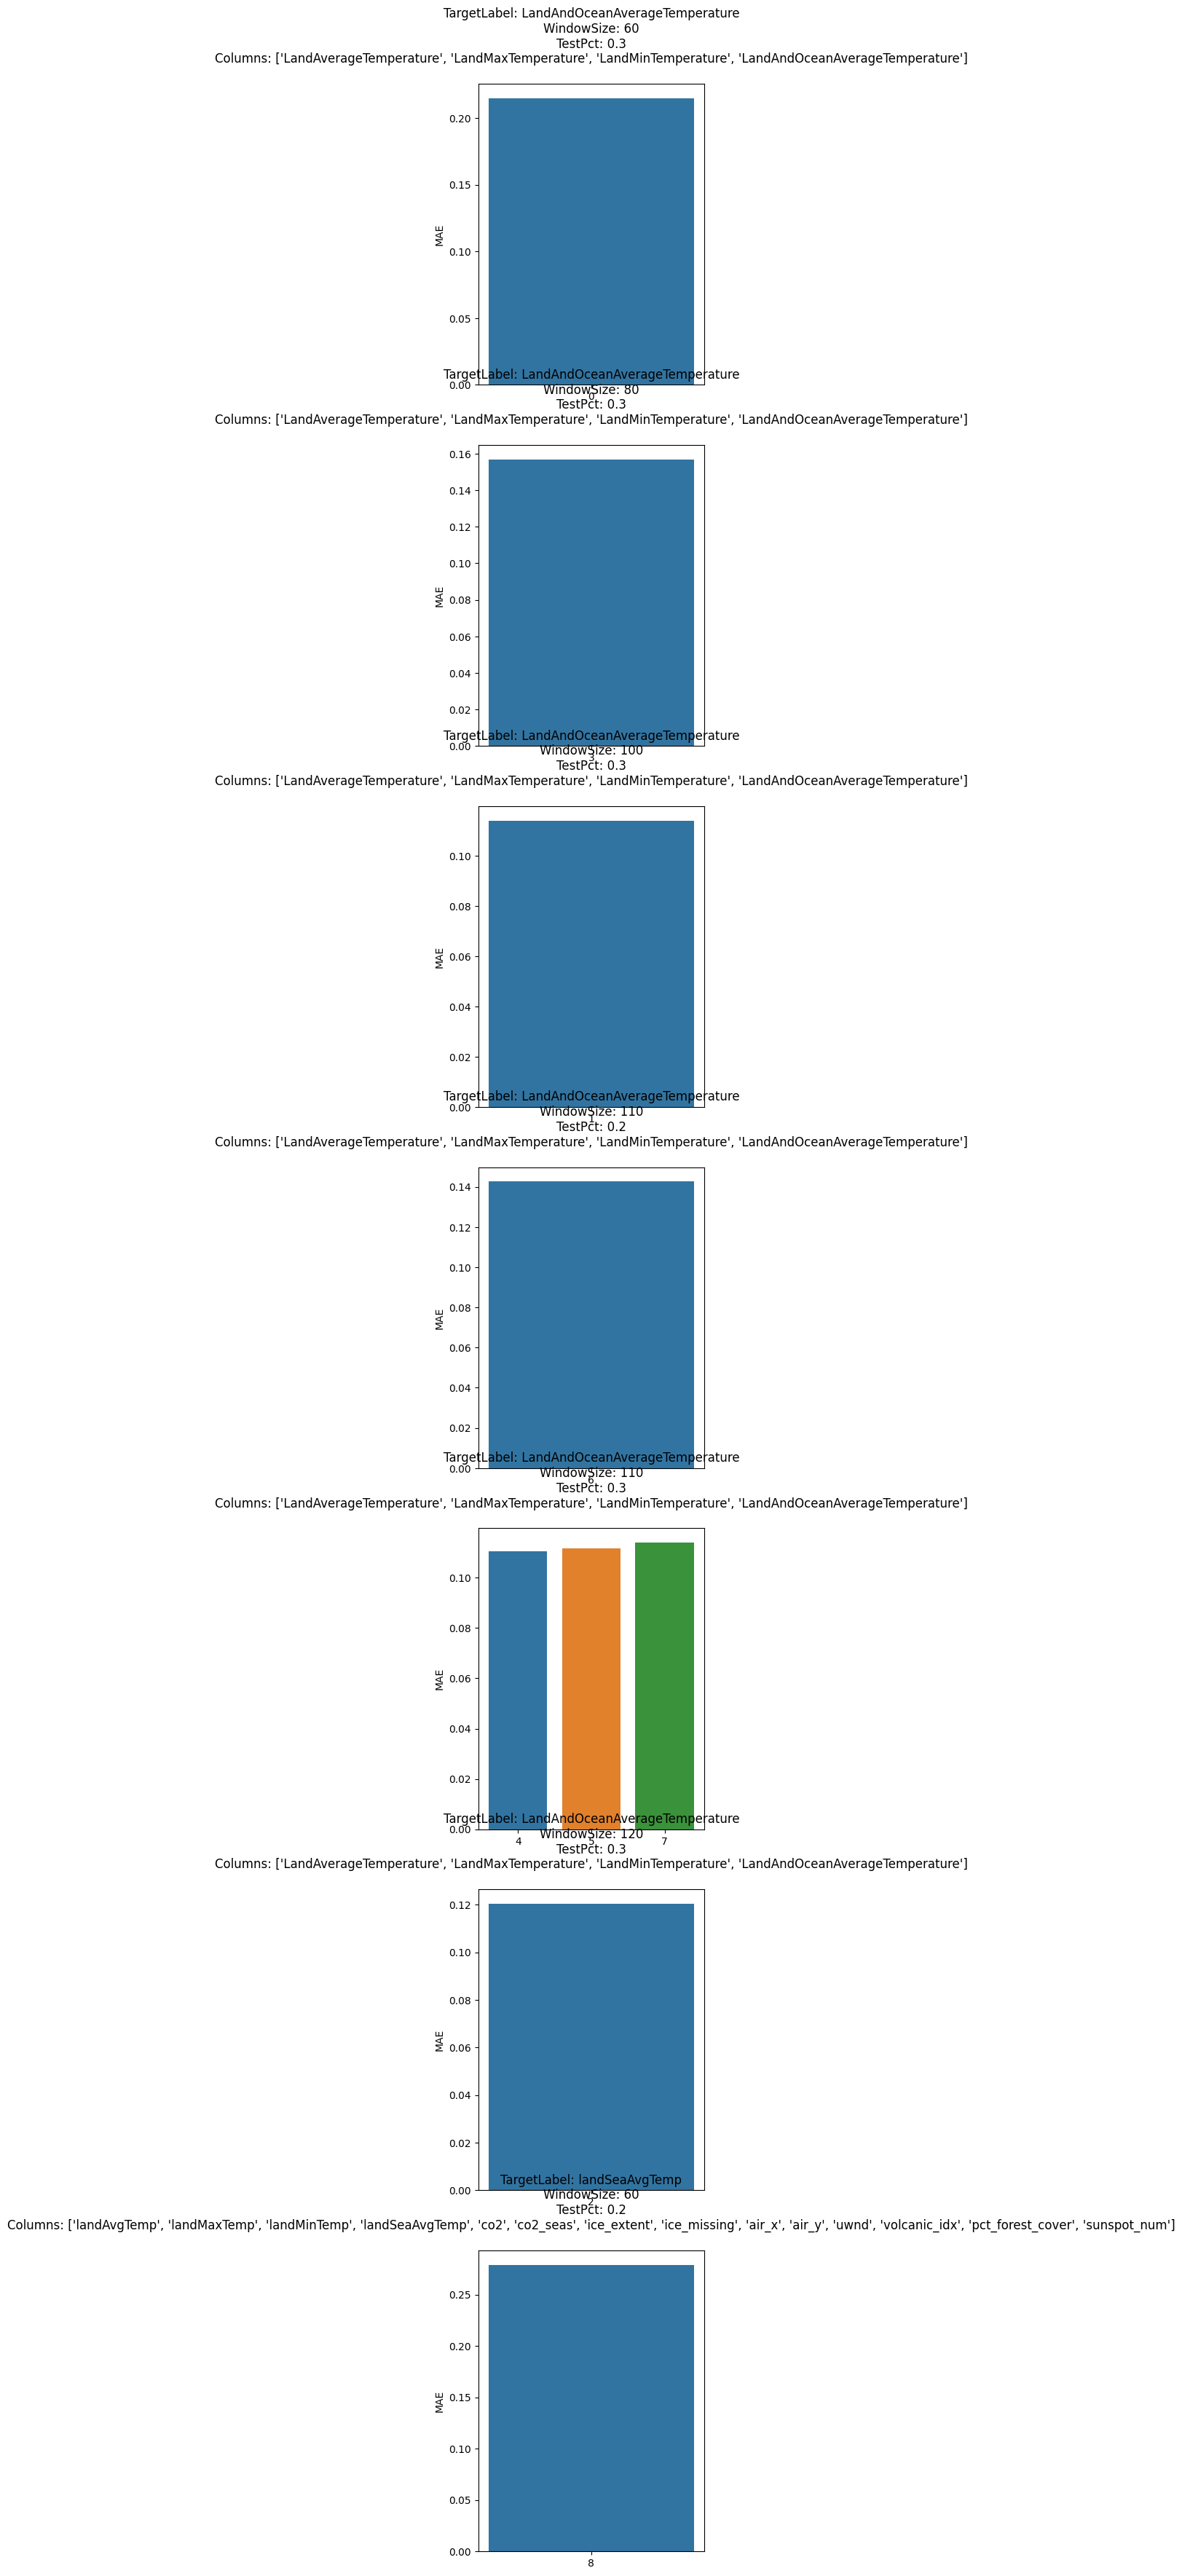

In [ ]:
#fig = plt.figure()
NUM_GROUPS = len(df_net.index)
fig, axes = plt.subplots(NUM_GROUPS, 1, figsize=(4, 44))

for i,idx in enumerate(df_net.index):
  df_res = df[(df[GROUP_COLS[TGT_LABEL]] == df_net.index[i][TGT_LABEL]) &
   (df[GROUP_COLS[WIND_SIZE]] == df_net.index[i][WIND_SIZE]) &
   (df[GROUP_COLS[TEST_PCT]] == df_net.index[i][TEST_PCT]) &
   (df[GROUP_COLS[COLS]] == df_net.index[i][COLS])]

  print(df_res)

  num_results = df_res.shape[0]
  this_ax = axes[i]

  #sns.histplot(x=df_res.index, y=df_res['MAE'], ax=this_ax)
  sns.barplot(x=df_res.index, y=df_res['MAE'], ax=this_ax)

  title_str = [f'{GROUP_COLS[t]}: {idx[t]}\n' for t in range(4)]
  title_str = ''.join(title_str)

  this_ax.set_title(title_str)
  #this_ax.xlabel('MAE')
  #this_ax.legend();

  this_ax.plot()

plt.show()